# Part 1: Muon Bremsstrahlung

In [121]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import math
import pylhe
import gzip
import shutil
import random
from skhep.math.vectors import LorentzVector, Vector3D

matplotlib.rcParams.update({'font.size': 13})

In [122]:
def get_p(particle):
    p=LorentzVector(particle['px'],particle['py'],particle['pz'],particle['e'])
    return p

def gunzip_file(filepath):
    with gzip.open(filepath+'.gz', 'rb') as f_in:
        with open(filepath, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

In [128]:
el_ptx=[]
el_ptmu=[]
el_ptq=[]
el_ex=[]
el_emu=[]
el_eq=[]
el_q=[]
el_weights=[]
enu=500
mass=100
filepath='../test1/Events/run_01/unweighted_events.lhe'
filepath='../run_900GeV_220MeV/Events/run_01/unweighted_events.lhe'
gunzip_file(filepath)

for event in pylhe.readLHE(filepath):
    px=get_p(event['particles'][4])
    el_ptx.append(px.pt)
    el_ex.append(px.e)
    pq=get_p(event['particles'][3])
    el_ptq.append(pq.pt)
    el_eq.append(pq.e)
    pmu=get_p(event['particles'][2])
    el_ptmu.append(pmu.pt)
    el_emu.append(pmu.e)
    pmu0=get_p(event['particles'][0])
    el_q.append(math.sqrt(-(pmu0-pmu).m))
    el_weights.append(event['eventinfo']['weight'])

for i,parts in enumerate(event['particles']):
    print (i, parts['id'])
    
print("mean ptx: ",np.mean(el_ptx))
print("mean ptq: ",np.mean(el_ptq))
print("mean ptmu: ",np.mean(el_ptmu))
print("mean ex: ",np.mean(el_ex))
print("mean eq: ",np.mean(el_eq))
print("mean emu: ",np.mean(el_emu))
print("mean q: ",np.mean(el_q))

el_weights=np.array(el_weights)/len(el_weights)

(0, 13.0)
(1, 101.0)
(2, 13.0)
(3, 101.0)
(4, 103.0)
('mean ptx: ', 0.17090554326461582)
('mean ptq: ', 0.021782875172561462)
('mean ptmu: ', 0.17263329767317606)
('mean ex: ', 629.3634112667162)
('mean eq: ', 20.4929171849403)
('mean emu: ', 270.63653954839685)
('mean q: ', 0.6517922010935013)


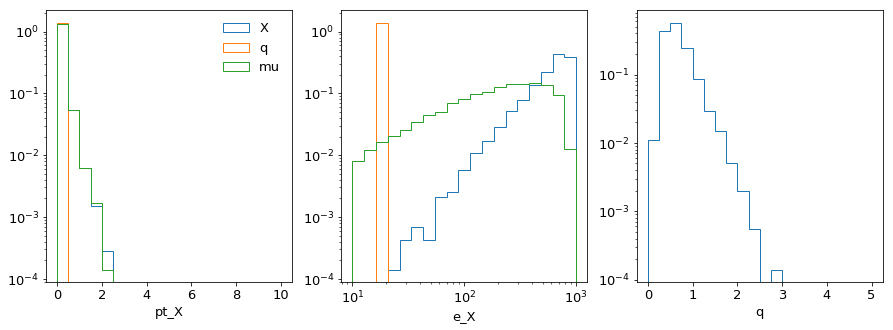

In [129]:
fig, (ax1, ax2,  ax3) = plt.subplots(1,3,figsize=(15,5))  
ax1.hist(el_ptx, weights=el_weights,normed=False,range=(0,10),bins=20,histtype='step',ls="solid",label="X")    
ax1.hist(el_ptq, weights=el_weights,normed=False,range=(0,10),bins=20,histtype='step',ls="solid",label="q")    
ax1.hist(el_ptmu, weights=el_weights,normed=False,range=(0,10),bins=20,histtype='step',ls="solid",label="mu")    
ax1.set_yscale("log")
ax1.legend(frameon=False)
ax1.set_xlabel("pt_X") 
ax2.hist(el_ex, weights=el_weights,normed=False,bins=np.logspace(np.log10(10),np.log10(1000), 20),histtype='step',ls="solid")  
ax2.hist(el_eq, weights=el_weights,normed=False,bins=np.logspace(np.log10(10),np.log10(1000), 20),histtype='step',ls="solid")  
ax2.hist(el_emu, weights=el_weights,normed=False,bins=np.logspace(np.log10(10),np.log10(1000), 20),histtype='step',ls="solid")  
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xlabel("e_X") 
ax3.hist(el_q, weights=el_weights,normed=False,range=(0,5),bins=20,histtype='step',ls="solid")   
ax3.set_yscale("log")
ax3.set_xlabel("q")
plt.show()

In [105]:
mum_flux=np.array([
    [100,0.0006446009],
    [300,0.0004297855],
    [500,0.0001252562],
    [700,0.0000478306],
    [900,0.0000417856],
    [1100,0.0000626709],
    [1300,0.0000648240],
    [1500,0.0000462420],
    [1700,0.0000293084],
    [1900,0.0000176580],
    [2100,0.0000106388],
    [2300,0.0000111917],
    [2500,0.0000104606],
    [2700,0.0000066300],
    [2900,0.0000053230],
    
#    [3100,0.0000032617],
#    [3300,0.0000014998],
#    [3500,0.0000011254],
])

def get_epsilon_int(q2, m12, m22):
    xmin=0.
    xmax=1.
    nx  =1000.
    dx  =(xmax-xmin)/nx
    
    alphaEM=1./137.;
    eEM= math.sqrt(4.*3.1415*alphaEM)
    output=0;
    for x in np.linspace(xmin+0.5*dx, xmax-+0.5*dx, num=nx):
        #output += x*(x-1.)*3*math.log( (m12+q2*x*(1-x))/(m22+q2*x*(1-x)) )*dx
        output += x*(x-1.)*3*math.log( (m12+q2*x*(1-x)) )*dx
    return output

def epsilon(mass,coup):
    alphaEM=1./137.;
    eEM= math.sqrt(4.*3.1415*alphaEM);
    m_el=0.000511
    m_mu=0.105658
    m_ta=1.776
    epsilon=coup*eEM/(4.*3.1415*3.1415)*get_epsilon_int(mass*mass,m_mu*m_mu,m_ta*m_ta)
    return epsilon

def ctau_lmultau(mass,coup):
    alphaEM  = 1./137.
    eEM      = math.sqrt(4.*3.1415*alphaEM)
    m_el     = 0.000511
    m_mu     = 0.105658
    m_ta     = 1.776
    hbarc    = 1.97*10.**(-14) # in GeV*cm
    
    gam_el = 0
    if (mass>2.*m_el):
        gam_el=mass/(12.*3.1415)*math.sqrt(1.-4.*m_el*m_el/(mass*mass))*(1+2.*m_el*m_el/(mass*mass))
    gam_el = gam_el*epsilon(mass,coup)*epsilon(mass,coup)*eEM*eEM
        
    gam_mu = 0
    if (mass>2.*m_mu):
        gam_mu=mass/(12.*3.1415)*math.sqrt(1.-4.*m_mu*m_mu/(mass*mass))*(1+2.*m_mu*m_mu/(mass*mass))
    gam_mu = gam_mu*coup*coup
        
    gam_ta = 0
    if (mass>2.*m_ta):
        gam_ta =mass/(12.*3.1415)*math.sqrt(1.-4.*m_ta*m_ta/(mass*mass))*(1+2.*m_ta*m_ta/(mass*mass))
    gam_ta = gam_ta*coup*coup
        
    gam_nu =mass/(24.*3.1415)
    gam_nu_el = 0
    gam_nu_mu = 0#gam_nu* coup* coup
    gam_nu_ta = 0#gam_nu* coup* coup
        
    gamma_ap = gam_el+gam_mu+gam_ta+gam_nu_el+gam_nu_mu+gam_nu_ta
#    print (mass, coup, gam_el/gamma_ap, epsilon(mass,coup)*eEM/coup)
    br_vis   = (gam_el+gam_mu+gam_ta)/gamma_ap
    br_mu    = gam_mu/gamma_ap
    return hbarc/gamma_ap, br_vis, br_mu

def particle_passes(position,p,rdet):
    momentum=Vector3D(p.px,p.py,p.pz)
    
    distance=0.-position.z
    pos_p=position+distance/momentum.z*momentum
    if type(pos_p) is np.ndarray:
        pos_p=Vector3D(pos_p[0],pos_p[1],pos_p[2])
    
    output=True
    if (math.sqrt(pos_p.x**2+pos_p.y**2)>rdet):
        output=False
    return output

def event_passes_3mu(position,p_mu,p_mu1,p_mu2,rdet):
    distance=0-position.z
    
    mom_mu=Vector3D(p_mu.px,p_mu.py,p_mu.pz)
    pos_mu=position+distance/mom_mu.z*mom_mu
    if type(pos_mu) is np.ndarray:
        pos_mu=Vector3D(pos_mu[0],pos_mu[1],pos_mu[2])
    if (math.sqrt(pos_mu.x**2+pos_mu.y**2)>rdet and p_mu.e>20):
        return False
        
    mom_mu=Vector3D(p_mu1.px,p_mu1.py,p_mu1.pz)
    pos_mu=position+distance/mom_mu.z*mom_mu
    if type(pos_mu) is np.ndarray:
        pos_mu=Vector3D(pos_mu[0],pos_mu[1],pos_mu[2])
    if (math.sqrt(pos_mu.x**2+pos_mu.y**2)>rdet and p_mu1.e>20):
        return False
        
    mom_mu=Vector3D(p_mu2.px,p_mu2.py,p_mu2.pz)
    pos_mu=position+distance/mom_mu.z*mom_mu
    if type(pos_mu) is np.ndarray:
        pos_mu=Vector3D(pos_mu[0],pos_mu[1],pos_mu[2])
    if (math.sqrt(pos_mu.x**2+pos_mu.y**2)>rdet and p_mu2.e>20):
        return False
        
    return True

def event_passes(position,p_mu,p_x,rdet):
    mom_mu=Vector3D(p_mu.px,p_mu.py,p_mu.pz)
    mom_x=Vector3D(p_x.px,p_x.py,p_x.pz)
    
    distance=0-position.z
    pos_x=position+distance/mom_x.z*mom_x
    pos_mu=position+distance/mom_mu.z*mom_mu
    
    output=True
    if (math.sqrt(pos_mu.x**2+pos_mu.y**2)<rdet):
        output=False
    if (math.sqrt(pos_x.x**2+pos_x.y**2)>rdet):
        output=False
    return output

def twobody_decay(
    p0,
    m0, m1, m2,
    phi, costheta):
    
    #energy and momentum of p2 in the rest frame of p0
    energy   = (m0*m0-m1*m1+m2*m2)/(2.*m0)
    momentum = math.sqrt(energy*energy-m2*m2)
    
    #4-momentum of p2 in the rest frame of p0
    en = energy
    pz = momentum * costheta
    py = momentum * math.sqrt(1.-costheta*costheta) * np.sin(phi)
    px = momentum * math.sqrt(1.-costheta*costheta) * np.cos(phi)
    p2=LorentzVector(px,py,pz,en)
    
    #boost p2 in lab frame
    return p2.boost(-1.*p0.boostvector)
    

def do_sampling(mass,muon_flux,lendet=150., rdet=10., dsample=30.,verbose=False):
    couplings=[]
    nsignals=[]
    ctaus=[]
    brs=[]
    for coup in np.logspace(-5.,-2., 31):
        couplings.append(1.*coup)
        nsignals.append(0.)
        ctaus.append(ctau_lmultau(mass,coup)[0])
        brs.append(ctau_lmultau(mass,coup)[1])
    
    nsample=1    
    Arock,Zrock=22,11        # standard rock
    length=90.*100.          # cm
    mproton=1.6605*10.**(-24)# g
    density=2.650            # g/cm3
    numdensity=density*length/(Arock*mproton)  # 1/cm2 # area number density
    size=dsample             # cm # sampling area += size meter in z,y dir around LOS
    area = 4.*size*size      # cm2
    inst_lumi= 2.*10.**(-5)  # ifb/sec
    use_lumi= 150.           # ifb
    n_events=10000
    energy_binsize=200.      # GeV, size of flux histogram bins
    pb_in_cm2=10.**(-36.)    # cm2/pb
    
    energies = muon_flux.T[0]
    fluxes   = muon_flux.T[1]
    
    for energy,flux in zip(energies,fluxes):
        
        #Get File
        str_mass=str(int(mass*1000))
        if mass==1.1: str_mass="1p1"
        str_energy=str(int(energy))
        filepath='../run_'+str(int(energy))+'GeV_'+str(int(mass*1000))+'MeV/Events/run_01/unweighted_events.lhe'
        if verbose: print (filepath)
        gunzip_file(filepath)
        
        #sample nsample times
        for isample in range(nsample):
            #loop over all events
            this_nsignals=np.array(nsignals)-np.array(nsignals)
            npass=0
            ntot=0
            pdec=np.array(nsignals)-np.array(nsignals)
            for event in pylhe.readLHE(filepath):
                #get momenta
                p_x=get_p(event['particles'][4])
                p_mu=get_p(event['particles'][3])
                crosssec=event['eventinfo']['weight']/n_events/nsample 
                #get decay position
                x0=random.uniform(-size,size)
                y0=random.uniform(-size,size)
                z0=random.uniform(-length,0)
                pos=Vector3D(x0,y0,z0)
                #check if X in angular acceptance and muon misses
                ntot+=1.
                if (event_passes(pos,p_mu,p_x,rdet) and p_x.e>100.):
                    weight_event =  flux*energy_binsize * area / inst_lumi * use_lumi * crosssec * pb_in_cm2 * numdensity
                    npass+=1.
                    for icoup,coup in enumerate(couplings):
                        ctau=ctaus[icoup]
                        br=brs[icoup]
                        dbar=ctau*p_x.p/mass
                        prob_decay=math.exp(-abs(z0)/dbar)-math.exp(-(abs(z0)+lendet)/dbar)
                        pdec[icoup]+=prob_decay
                        nsignals[icoup]+=weight_event* (coup/0.0001)**2. *prob_decay*br   
                        this_nsignals[icoup]+=weight_event* (coup/0.0001)**2. *prob_decay*br   
#            print ( filepath, isample, this_nsignals,npass/ntot,ntot,pdec/npass)
#            print (energy,this_nsignals,npass/ntot,pdec/npass)
                        
    return couplings, ctaus, brs, nsignals

def do_sampling_3mu(mass,muon_flux,lendet=150., rdet=10., dsample=10.,verbose=False,lrock=90000.,rhorock=2.650,Arock=22,Zrock=11):
    couplings=[]
    nsignals=[]
    ctaus=[]
    brmus=[]
    for coup in np.logspace(-5.,-2., 31):
        couplings.append(1.*coup)
        nsignals.append(0.)
        ctaus.append(ctau_lmultau(mass,coup)[0])
        brmus.append(ctau_lmultau(mass,coup)[2])
    
    nsample=1  
    nsample2=10
    length=  lrock           # cm  
    mproton=1.6605*10.**(-24)# g
    density=rhorock          # g/cm3
    numdensity=density*length/(Arock*mproton)  # 1/cm2 # area number density
    size=dsample             # cm # sampling area += size meter in z,y dir around LOS
    area = 4.*size*size      # cm2
    inst_lumi= 2.*10.**(-5)  # ifb/sec
    use_lumi= 150.           # ifb
    n_events=10000
    energy_binsize=200.      # GeV, size of flux histogram bins
    pb_in_cm2=10.**(-36.)    # cm2/pb
    m_mu     = 0.105658      # GeV
    
    energies = muon_flux.T[0]
    fluxes   = muon_flux.T[1]
    
    if mass<2.*m_mu:
        return couplings, ctaus, brmus, nsignals
    
    for energy,flux in zip(energies,fluxes):
        
        #Get File
        str_mass=str(int(mass*1000))
        if mass==1.1: str_mass="1p1"
        str_energy=str(int(energy))
        filepath='../run_'+str(int(energy))+'GeV_'+str(int(mass*1000))+'MeV/Events/run_01/unweighted_events.lhe'
        if verbose: print (filepath)
        gunzip_file(filepath)
        
        #sample nsample times
        for isample in range(nsample):
            #loop over all events
            this_nsignals=np.array(nsignals)-np.array(nsignals)
            npass=0
            ntot=0
            for event in pylhe.readLHE(filepath):
                #get momenta
                p_x=get_p(event['particles'][4])
                p_mu=get_p(event['particles'][3])
                crosssec=event['eventinfo']['weight']/n_events/nsample 
                for jsample in range(nsample2):
                    #get decay position
                    x0=random.uniform(-size,size)
                    y0=random.uniform(-size,size)
                    z0=random.uniform(-length,0)
                    pos=Vector3D(x0,y0,z0)
                    #get decay angles in X restframe 
                    phi=random.uniform(-math.pi,math.pi)
                    costheta=random.uniform(-1.,1.)
                    #get decay muons
                    p_mu1=twobody_decay(p_x,mass, m_mu, m_mu, phi, costheta)
                    p_mu2=twobody_decay(p_x,mass, m_mu, m_mu, -1.*phi, -1.*costheta)
                    #check if all three  muons are in angular acceptance 
                    ntot+=1.
                    if (event_passes_3mu(pos,p_mu,p_mu1,p_mu2,rdet)):
                        weight_event =  flux*energy_binsize * area / inst_lumi * use_lumi * crosssec * pb_in_cm2 * numdensity / float(nsample2)
                        npass+=1.
                        for icoup,coup in enumerate(couplings):
                            ctau=ctaus[icoup]
                            br=brmus[icoup]
                            nsignals[icoup]+=weight_event* (coup/0.0001)**2.*br   
                            this_nsignals[icoup]+=weight_event* (coup/0.0001)**2.*br  
#            if verbose: print ( filepath, isample, this_nsignals)
            if verbose:print npass
                        
    return couplings, ctaus, brmus, nsignals

In [6]:
masses=[0.0011,0.002,0.005,0.007,0.01,0.015,0.02,0.03,0.04,0.05,0.07,0.1,0.12,0.15,0.17,0.2,0.21,0.22,0.3,]
masses=[0.0011,0.002,0.005,0.007,0.01,0.02,0.05,0.07,0.1,0.12,0.15,0.17,0.2,0.21,0.22,]
nsigs=[]
nsigsF2=[]
for mass in masses:
    couplings,_,_,nsig=do_sampling(mass,mum_flux,verbose=True)
    nsigs.append(nsig)
m, c = np.meshgrid(masses, couplings)

for mass in masses:
    couplings,_,_,nsig=do_sampling(mass,mum_flux,lendet=500, rdet=100, dsample=300,verbose=True)
    nsigsF2.append(nsig)

/Users/felixkling/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


../../muN_muNap_elastic/run_100GeV_1MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_300GeV_1MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_500GeV_1MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_700GeV_1MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_900GeV_1MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_1100GeV_1MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_1300GeV_1MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_1500GeV_1MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_1700GeV_1MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_1900GeV_1MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_2100GeV_1MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_2300GeV_1MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_2500GeV_1MeV/Events/run_01/unweighted_events.lhe
../.

../../muN_muNap_elastic/run_500GeV_70MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_700GeV_70MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_900GeV_70MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_1100GeV_70MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_1300GeV_70MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_1500GeV_70MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_1700GeV_70MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_1900GeV_70MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_2100GeV_70MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_2300GeV_70MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_2500GeV_70MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_2700GeV_70MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_2900GeV_70MeV/Events/run_01/unweighted_

../../muN_muNap_elastic/run_500GeV_220MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_700GeV_220MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_900GeV_220MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_1100GeV_220MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_1300GeV_220MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_1500GeV_220MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_1700GeV_220MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_1900GeV_220MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_2100GeV_220MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_2300GeV_220MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_2500GeV_220MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_2700GeV_220MeV/Events/run_01/unweighted_events.lhe
../../muN_muNap_elastic/run_2900GeV_220MeV/Events/run_0

In [101]:
massesX=[0.0011,0.01,0.1,0.21,0.22,0.3,0.4,0.5,0.7,1.0]
nsigsX=[]
nsigsXF2=[]
for mass in massesX:
    couplingsX,_,_,nsigX=do_sampling_3mu(mass,mum_flux,verbose=True)
    nsigsX.append(nsigX)
mX, cX = np.meshgrid(massesX, couplingsX)

for mass in massesX:
    couplingsX,_,_,nsigX=do_sampling_3mu(mass,mum_flux,lendet=500, rdet=100, dsample=20,verbose=True)
    nsigsXF2.append(nsigX)

/Users/felixkling/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


../../muN_muNap_elastic/run_100GeV_220MeV/Events/run_01/unweighted_events.lhe
17.0
../../muN_muNap_elastic/run_300GeV_220MeV/Events/run_01/unweighted_events.lhe
19.0
../../muN_muNap_elastic/run_500GeV_220MeV/Events/run_01/unweighted_events.lhe
9.0
../../muN_muNap_elastic/run_700GeV_220MeV/Events/run_01/unweighted_events.lhe
11.0
../../muN_muNap_elastic/run_900GeV_220MeV/Events/run_01/unweighted_events.lhe
13.0
../../muN_muNap_elastic/run_1100GeV_220MeV/Events/run_01/unweighted_events.lhe
10.0
../../muN_muNap_elastic/run_1300GeV_220MeV/Events/run_01/unweighted_events.lhe
8.0
../../muN_muNap_elastic/run_1500GeV_220MeV/Events/run_01/unweighted_events.lhe
11.0
../../muN_muNap_elastic/run_1700GeV_220MeV/Events/run_01/unweighted_events.lhe
9.0
../../muN_muNap_elastic/run_1900GeV_220MeV/Events/run_01/unweighted_events.lhe
12.0
../../muN_muNap_elastic/run_2100GeV_220MeV/Events/run_01/unweighted_events.lhe
9.0
../../muN_muNap_elastic/run_2300GeV_220MeV/Events/run_01/unweighted_events.lhe
9.0
..

7.0
../../muN_muNap_elastic/run_1900GeV_220MeV/Events/run_01/unweighted_events.lhe
9.0
../../muN_muNap_elastic/run_2100GeV_220MeV/Events/run_01/unweighted_events.lhe
15.0
../../muN_muNap_elastic/run_2300GeV_220MeV/Events/run_01/unweighted_events.lhe
15.0
../../muN_muNap_elastic/run_2500GeV_220MeV/Events/run_01/unweighted_events.lhe
5.0
../../muN_muNap_elastic/run_2700GeV_220MeV/Events/run_01/unweighted_events.lhe
6.0
../../muN_muNap_elastic/run_2900GeV_220MeV/Events/run_01/unweighted_events.lhe
8.0
../../muN_muNap_elastic/run_100GeV_300MeV/Events/run_01/unweighted_events.lhe
28.0
../../muN_muNap_elastic/run_300GeV_300MeV/Events/run_01/unweighted_events.lhe
16.0
../../muN_muNap_elastic/run_500GeV_300MeV/Events/run_01/unweighted_events.lhe
7.0
../../muN_muNap_elastic/run_700GeV_300MeV/Events/run_01/unweighted_events.lhe
15.0
../../muN_muNap_elastic/run_900GeV_300MeV/Events/run_01/unweighted_events.lhe
15.0
../../muN_muNap_elastic/run_1100GeV_300MeV/Events/run_01/unweighted_events.lhe
5.0

In [106]:
massesY=[0.0011,0.01,0.1,0.21,0.22,0.3,0.4,0.5,0.7,1.0]
nsigsY=[]
nsigsYF2=[]
for mass in massesY:
    couplingsY,_,_,nsigY=do_sampling_3mu(mass,mum_flux,verbose=True,
        lrock=100,rhorock=19.6,Arock=184,Zrock=74,dsample=12.5)
    nsigsY.append(nsigY)
mY, cY = np.meshgrid(massesY, couplingsY)



/Users/felixkling/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


../../muN_muNap_elastic/run_100GeV_220MeV/Events/run_01/unweighted_events.lhe
1031.0
../../muN_muNap_elastic/run_300GeV_220MeV/Events/run_01/unweighted_events.lhe
741.0
../../muN_muNap_elastic/run_500GeV_220MeV/Events/run_01/unweighted_events.lhe
634.0
../../muN_muNap_elastic/run_700GeV_220MeV/Events/run_01/unweighted_events.lhe
595.0
../../muN_muNap_elastic/run_900GeV_220MeV/Events/run_01/unweighted_events.lhe
643.0
../../muN_muNap_elastic/run_1100GeV_220MeV/Events/run_01/unweighted_events.lhe
599.0
../../muN_muNap_elastic/run_1300GeV_220MeV/Events/run_01/unweighted_events.lhe
590.0
../../muN_muNap_elastic/run_1500GeV_220MeV/Events/run_01/unweighted_events.lhe
516.0
../../muN_muNap_elastic/run_1700GeV_220MeV/Events/run_01/unweighted_events.lhe
513.0
../../muN_muNap_elastic/run_1900GeV_220MeV/Events/run_01/unweighted_events.lhe
478.0
../../muN_muNap_elastic/run_2100GeV_220MeV/Events/run_01/unweighted_events.lhe
503.0
../../muN_muNap_elastic/run_2300GeV_220MeV/Events/run_01/unweighted_e

In [107]:
def readfile(filename):
    list_of_lists = []
    with open(filename) as f:
        for line in f:
            inner_list = [float(elt.strip()) for elt in line.split( )]
            list_of_lists.append(inner_list)
    return np.array(list_of_lists)

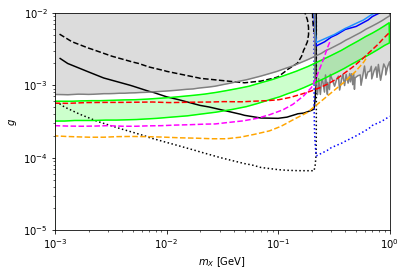

In [120]:
bound_gm2=readfile("curves/bound_gm2.txt")
bound_babar=readfile("curves/bound_babar.txt")
anomaly_gm2=readfile("curves/anomaly_gm2.txt")
limits_atlas=readfile("curves/limits_atlas.txt")
limits_na62=readfile("curves/limits_na62.txt")
limits_na64=readfile("curves/limits_na64.txt")
limits_m31=readfile("curves/limits_m31.txt")
limits_m32=readfile("curves/limits_m32.txt")

levels = [2.4]

plt.figure()
plt.plot(bound_gm2.T[0], bound_gm2.T[1], color="grey")
plt.fill_between(bound_gm2.T[0], bound_gm2.T[1], color="gainsboro")
plt.plot(bound_babar.T[0], bound_babar.T[1], color="grey")
plt.fill_between(bound_babar.T[0], bound_babar.T[1], color="gainsboro")
plt.plot(anomaly_gm2.T[0], anomaly_gm2.T[1], color="lime")
plt.fill_between(anomaly_gm2.T[0], anomaly_gm2.T[1], color="lime",alpha=0.2)
plt.plot(limits_atlas.T[0], limits_atlas.T[1], color="red",ls="dashed")
plt.plot(limits_na62.T[0], limits_na62.T[1], color="magenta",ls="dashed")
plt.plot(limits_m31.T[0], limits_m31.T[1], color="orange",ls="dashed")
#plt.plot(limits_m32.T[0], limits_m32.T[1], color="orange",ls="dotted")
#plt.plot(limits_na64.T[0], limits_na64.T[1], color="darkred",ls="dashed")

plt.contour(m, c, np.array(nsigs).T*20,levels=levels,colors="black")
plt.contour(m, c, np.array(nsigsF2).T*20,levels=levels,colors="black",linestyles="dotted")
plt.contour(m, c, np.array(nsigs).T,levels=levels,colors="black",linestyles="dashed")

plt.contour(mX, cX, np.array(nsigsX).T*20,levels=levels,colors="blue")
plt.contour(mX, cX, np.array(nsigsXF2).T*20,levels=levels,colors="blue",linestyles="dotted")
plt.contour(mX, cX, np.array(nsigsX).T,levels=levels,colors="blue",linestyles="dashed")

plt.contour(mY, cY, np.array(nsigsY).T,levels=levels,colors="dodgerblue",linestyles="dashed")
plt.contour(mY, cY, np.array(nsigsY).T*20,levels=levels,colors="dodgerblue")

plt.xlabel(r'$m_X$ [GeV]')
plt.ylabel(r'$g$')
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.001,1)
plt.ylim(0.00001,0.01)
plt.show()